In [1]:
import pandas as pd

In [2]:
import visualization as vis
import data_manage as dm
import lrlo as lrlo

In [3]:
LOG_ROOT = 'data/logs/'
CSV_ROOT = 'data/csvs/'

In [4]:
# backlog_path = CSV_ROOT + "test_backlog_masking.csv"
# latency_path = CSV_ROOT + "test_latency_masking.csv"
# backlog_path = CSV_ROOT + "test_backlog_unmasking.csv"
# latency_path = CSV_ROOT + "test_latency_unmasking.csv"
backlog_path = CSV_ROOT + "test_backlog.csv"
latency_path = CSV_ROOT + "test_latency.csv"
log_dir_train = LOG_ROOT + "train/240318-184226_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.35"
log_dir_masking = LOG_ROOT + "test/JK-1_TEST_LOWEPS_Agent2_MASK_same_003"
log_dir_unmasking = LOG_ROOT + "test/JK-1_TEST_LOWEPS_Agent3_same_003"

In [5]:
color_list = ["tomato", "salmon", "darkorange", "gold", "forestgreen", "mediumseagreen", "cornflowblue", "royalblue", "steelblue", "slateblue"]

In [6]:
network_config = {
    "abilene" : {
        "node_num" : 11,
        "dest_node" : ["node 9", "node 10", "node 11"]
    },
    # TODO: config 받으면 그 떄 수정할 것
    "yolo" : {
        "node_num" : 3,
        "dest_node" : ["node 2"]
    }
}

In [7]:
def plot_fraction():
    """omnet: plot_send를 기반으로 초당 보낸 프레임의 비율 변화 그래프를 그림"""


def plot_each_backlog():
    """omnet: 각 virtusl node OR virtual link OR physical node의 backlog 그래프들을 각각 따로 그림"""

def plot_comparison_backlog():
    """omnet: virtual backlog의 합 / physical node의 합 그래프를 따로 그림"""

def plot_each_latency():
    """omnet: destination 노드별 layency 그래프를 그림"""

### 1. Plot log Data

In [8]:
# Load Data
tag_list = ["Network/Diff", "Network/send_a(t)", "Network/target_A(t)"]

train = dm.load_log(log_dir_train)
masking = dm.load_log(log_dir_masking, tag_list)
unmasking = dm.load_log(log_dir_unmasking, tag_list)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [9]:
# lrlo.plot_reward()
# lrlo.plot_comparison_reward()
# plot_frame_barcode(masking, color="green")
# plot_frame_barcode(unmasking, color="red")

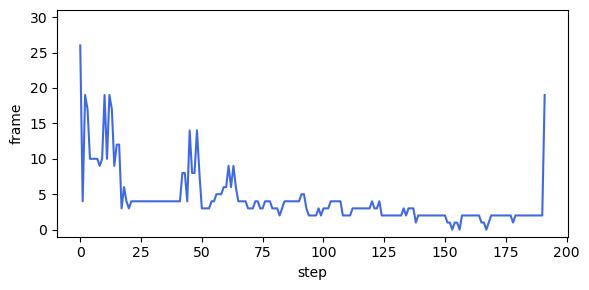

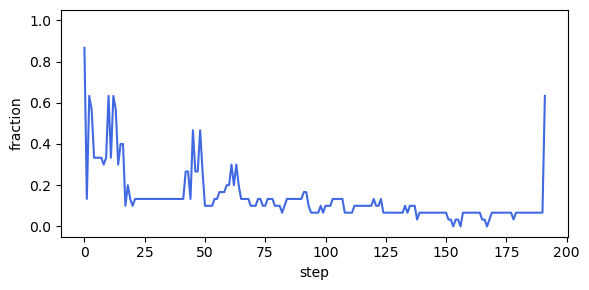

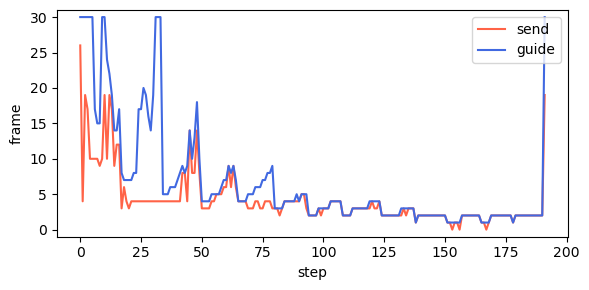

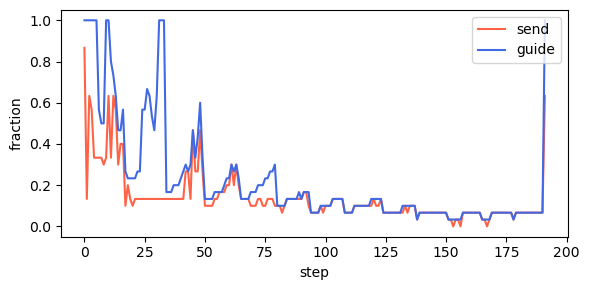

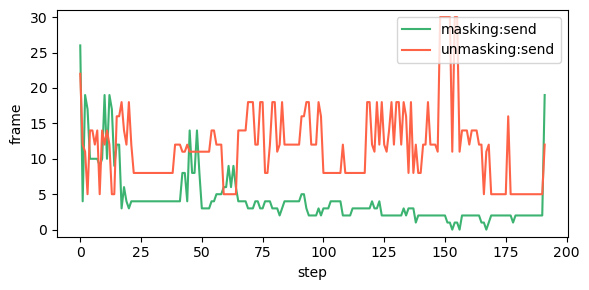

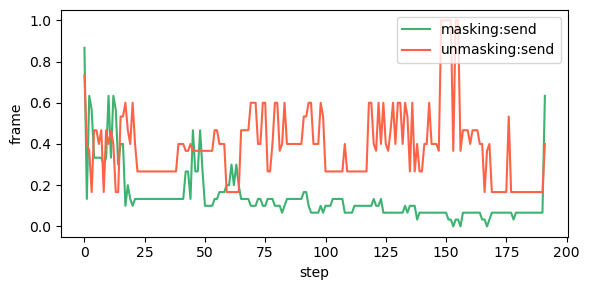

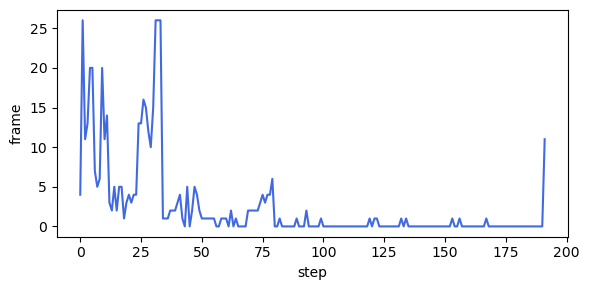

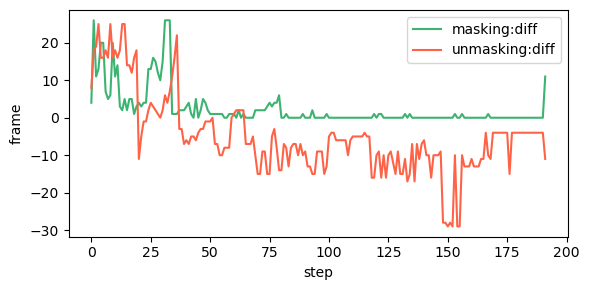

In [10]:
lrlo.plot_send(masking)
lrlo.plot_fraction(masking)
lrlo.plot_send_and_guide(masking)
lrlo.plot_send_and_guide_as_fraction(masking)
lrlo.plot_comparison_send([masking, unmasking], ["masking", "unmasking"])
lrlo.plot_comparison_fraction([masking, unmasking], ["masking", "unmasking"])
lrlo.plot_diff(masking)
lrlo.plot_comparison_diff([masking, unmasking], ["masking", "unmasking"])

### 2. Plot OMNeT++ Data

In [11]:
# Load Data
latency = dm.load_csv(latency_path)
latency_df = lrlo.parse_omnet_csv(latency, 'latency', node_list=["node9", "node10", "node11"])

backlog_df = dm.load_csv(backlog_path)
backlog_df = lrlo.parse_omnet_csv(backlog_df, 'backlog')

sum_df = lrlo.get_backlog_sum(backlog_df)

d:\VSC\INFOCOM\Visualization-is-All-you-Need\lrlo.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['name'] = extracted_df['name'].str[3:]
